<a href="https://colab.research.google.com/github/Khushi804/ecommerce/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
dataset = pd.read_csv("uber_dataset.csv")
dataset.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 17:26,11-05-2015 17:55,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 18:46,11-05-2015 19:12,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-05-2015 09:15,13-05-2015 10:38,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 00:24,16-05-2015 00:44,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 01:29,16-05-2015 02:18,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [ ]:
dataset.head(3)

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 17:26,11-05-2015 17:55,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 18:46,11-05-2015 19:12,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-05-2015 09:15,13-05-2015 10:38,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none


In [ ]:
dataset.shape

(678, 45)

In [ ]:
dataset.size

30510

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_completed_at      678 non-null    object 
 1   trip_status            678 non-null    object 
 2   ride_hailing_app       678 non-null    object 
 3   trip_uid               678 non-null    object 
 4   driver_uid             678 non-null    object 
 5   rider_uid              678 non-null    object 
 6   customer               678 non-null    object 
 7   trip_start_time        678 non-null    object 
 8   trip_end_time          678 non-null    object 
 9   trip_time              678 non-null    object 
 10  total_time             678 non-null    object 
 11  wait_time              678 non-null    object 
 12  trip_type              678 non-null    object 
 13  surge_multiplier       643 non-null    float64
 14  vehicle_make_model     678 non-null    object 
 15  vehicl

In [ ]:
dataset['surge_multiplier'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
673    False
674    False
675    False
676    False
677    False
Name: surge_multiplier, Length: 678, dtype: bool

In [ ]:
dataset[dataset['surge_multiplier'].isnull()].head(5)

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
20,"June 12, 2015 at 6:01PM",Completed,Gett,c9df3a9edb2c7b37c80f9ffa5e1b8c36,151944a8f9967b3edad02deb712d61f2,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,12-06-2015 16:25,12-06-2015 17:01,00:21:12,...,12.81,2015-06-12T16:25:00,19,19,0.62,3.51,0.49,partly-cloudy-day,Partly Cloudy,none
135,"March 5, 2016 at 4:35PM",Completed,Gett,19564cbd0929d51297a5fce739a5c777,524f217db5cb84a0c343cb7f05f40f52,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,05-03-2016 15:14,05-03-2016 15:35,00:18:01,...,5.71,2016-03-05T15:14:00,2,-1,0.93,2.41,0.97,rain,Drizzle,rain
137,"March 17, 2016 at 12:57PM",Completed,Gett,2f7ca9c163bb40c5e5b49771e929075a,af6d53a1a051b89037613fa74b0a2039,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,17-03-2016 11:38,17-03-2016 11:57,00:10:50,...,5.90,2016-03-17T11:38:00,4,1,0.72,4.38,0.76,partly-cloudy-day,Mostly Cloudy,none
142,"April 3, 2016 at 3:15PM",Completed,Gett,b603f7e2fbda958c778a8e236b369b34,b700e12aef6fe616f4132b5b10735f26,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,03-04-2016 14:05,03-04-2016 14:13,00:04:40,...,2.15,2016-04-03T14:05:00,7,6,0.57,1.68,0.75,rain,Light Rain,rain
199,"July 29, 2016 at 3:35PM",Completed,Gett,1e4023aecad6062b038656b9bec5b433,e75db42065bc8e071d2b57c0c9977376,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,29-07-2016 13:57,29-07-2016 14:35,00:21:56,...,23.70,2016-07-29T13:57:00,22,22,0.81,2.47,0.87,partly-cloudy-day,Mostly Cloudy,none


In [ ]:
dataset[dataset['trip_status'] !='completed'].head(50)

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 17:26,11-05-2015 17:55,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 18:46,11-05-2015 19:12,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-05-2015 09:15,13-05-2015 10:38,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 00:24,16-05-2015 00:44,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 01:29,16-05-2015 02:18,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none
5,"May 18, 2015 at 11:06AM",Completed,Uber,5c0312a92ff104197d799c42ae67542f,fc6b1516376f15c97e508d904505d27a,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,18-05-2015 09:32,18-05-2015 10:06,00:16:38,...,4.88,2015-05-18T09:32:00,7,5,0.83,2.73,0.99,cloudy,Overcast,none
6,"May 18, 2015 at 11:08PM",Completed,Uber,4ad2e954813b53afeb73ce659ac3376c,1b926e88a8477f7b5d1fad298e00fb11,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,18-05-2015 21:24,18-05-2015 22:08,00:40:24,...,18.65,2015-05-18T21:24:00,6,3,0.89,4.08,0.98,cloudy,Overcast,none
7,"May 19, 2015 at 9:10AM",Completed,Uber,1e3935b05addc654d65e72b8da96fd43,439ae2cf8ae38bc24b2f8dbc3f0b987d,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,19-05-2015 07:12,19-05-2015 08:10,00:41:56,...,12.62,2015-05-19T07:12:00,6,4,0.96,3.96,0.89,partly-cloudy-day,Mostly Cloudy,none
8,"May 19, 2015 at 12:37PM",Completed,Uber,0eb9a9f7a3fd598c885c67af75645c06,75a4c47c323bcc96ac5849052b19ed5f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,19-05-2015 11:22,19-05-2015 11:37,00:10:06,...,5.94,2015-05-19T11:22:00,8,5,0.88,4.64,0.84,partly-cloudy-day,Mostly Cloudy,none
9,"May 19, 2015 at 10:33PM",Completed,Uber,b56495d149fea002e04438a3369ab532,176f50c4249ddc7b086d8997349d9ae5,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,19-05-2015 21:00,19-05-2015 21:33,00:25:30,...,17.38,2015-05-19T21:00:00,9,9,0.82,0.86,0.69,partly-cloudy-day,Mostly Cloudy,none


In [ ]:
dataset.trip_start_address.unique()

array(['ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, Russia, 194354',
       'Podrezova ulitsa, 2, Sankt-Peterburg, Russia, 197136',
       'Pushkarskiy pereulok, Sankt-Peterburg, Russia, 197101',
       'Voznesenskiy prospekt, 6, Sankt-Peterburg, Russia, 190000',
       'ulitsa Efimova, 4, Sankt-Peterburg, Russia, 190031',
       'Khersonskiy proyezd, 4А, Sankt-Peterburg, Russia, 191167',
       'ulitsa Esenina, 1 корпус 1, Sankt-Peterburg, Russia, 194354',
       'Furshtatskaya ulitsa, 21, Sankt-Peterburg, Russia, 191028',
       'ulitsa Efimova, 2, Sankt-Peterburg, Russia, 190031',
       "Koltsovo Airport (SVX), ulitsa Bahchivandji, 4, Yekaterinburg, Sverdlovskaya oblast', Russia, 620056",
       "Koltsovo Airport (SVX), ulitsa Bahchivandji, 1, Yekaterinburg, Sverdlovskaya oblast', Russia, 620056",
       "ulitsa Akademika Shvartsa, 2/1, Yekaterinburg, Sverdlovskaya oblast', Russia, 620085",
       "Vokzalnaya ulitsa, 23А, Yekaterinburg, Sverdlovskaya oblast', Russia, 620027",
    

In [ ]:
dataset.trip_start_address.nunique()

309

In [ ]:
dataset.trip_end_address.unique()

array(['Bolshoy prospekt PS, 74, Sankt-Peterburg, Russia, 197136',
       'ulitsa Esenina, 1 корпус 1, Sankt-Peterburg, Russia, 194354',
       "ploshchad' Aleksandra Nevskogo, 2, Sankt-Peterburg, Russia, 191317",
       'Voznesenskiy prospekt, 3, Sankt-Peterburg, Russia, 190000',
       'ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, Russia, 194354',
       'Khersonskiy proyezd, 4А, Sankt-Peterburg, Russia, 191167',
       'prospekt Chernyshevskogo, 17, Sankt-Peterburg, Russia, 191123',
       'Sinopskaya naberezhnaya, 24, Sankt-Peterburg, Russia, 191167',
       "Samotsvetnyy bulvar, 4, Yekaterinburg, Sverdlovskaya oblast', Russia, 620085",
       "ulitsa Akademika Shvartsa, 2/1, Yekaterinburg, Sverdlovskaya oblast', Russia, 620085",
       "ulitsa Chelyuskintsev, 29, Yekaterinburg, Sverdlovskaya oblast', Russia, 620027",
       "Vokzalnaya ulitsa, 23А, Yekaterinburg, Sverdlovskaya oblast', Russia, 620027",
       "ulitsa Vaynera, 64В, Yekaterinburg, Sverdlovskaya oblast', Russia, 6200

In [ ]:
dataset.trip_end_address.nunique()

268

In [ ]:
dataset['trip_start_address'].value_counts().head(10)

Paradnaya Ulitsa, 3, Sankt-Peterburg, Russia, 191014                       173
Sverdlovskaya naberezhnaya, 44Д/4Б, Sankt-Peterburg, Russia, 195027         40
Sofyi Kovalevskoy ul., 14к6А, Sankt-Peterburg, Russia, 195256               23
Pulkovo Airport (LED), Unnamed Road, Sankt-Peterburg, Russia, 196210        20
Sofyi Kovalevskoy ulitsa, 14 корпус 6А, Sankt-Peterburg, Russia, 195256     16
Irinovskiy Prospekt, 32 Sankt-Peterburg 195030                              10
ul. Kollontay, 1, Sankt-Peterburg, Russia, 193230                            7
Yakornaya Ulitsa, 5А, Sankt-Peterburg, Russia, 195027                        6
Magnitogorskaya ul., 11, Sankt-Peterburg, Russia, 195027                     6
Ulitsa Dzhona Rida, 2, Sankt-Peterburg, Russia, 193318                       5
Name: trip_start_address, dtype: int64

In [ ]:
dataset['trip_end_address'].value_counts().head(10)

Paradnaya Ulitsa, 3, Sankt-Peterburg, Russia, 191014                       183
Sverdlovskaya naberezhnaya, 44Д/4Б, Sankt-Peterburg, Russia, 195027         59
Sofyi Kovalevskoy ul., 14к6А, Sankt-Peterburg, Russia, 195256               29
Pulkovo Airport (LED), Unnamed Road, Sankt-Peterburg, Russia, 196210        28
Sofyi Kovalevskoy ulitsa, 14 корпус 6А, Sankt-Peterburg, Russia, 195256     15
Kirishskaya ul., 11, Sankt-Peterburg, Russia, 195299                        13
Yakornaya Ulitsa, 5А, Sankt-Peterburg, Russia, 195027                       12
Irinovskiy Prospekt, 32 Sankt-Peterburg 195030                               9
pr. Solidarnosti, 5, Sankt-Peterburg, Russia, 193312                         6
Irinovskiy pr., 34, Sankt-Peterburg, Russia, 195030                          5
Name: trip_end_address, dtype: int64

In [ ]:
dataset[dataset['trip_start_address']==dataset['trip_end_address']]

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
14,"June 3, 2015 at 5:20PM",Completed,Uber,30bd4a26ca276b8f04a01d87ea3777fc,ef33153fbce5b15f93d9319528dc598f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,03-06-2015 15:43,03-06-2015 16:20,00:12:39,...,0.29,2015-06-03T15:43:00,28,30,0.61,4.90,0,clear-day,Clear,rain
21,"June 14, 2015 at 7:44AM",Cancelled,Uber,b970e99cf7d4e163c9808ed945f9e5be,a89bc69e8452fcec3f650b688f6e3473,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,14-06-2015 05:58,14-06-2015 06:44,00:01:00,...,0.10,2015-06-14T05:58:00,17,17,0.69,0.88,0.32,partly-cloudy-day,Partly Cloudy,none
121,"December 26, 2015 at 2:05PM",Completed,Uber,6ea41ffb88c316d552d2cf9c81226d96,8e78bc6f8711a06d85f0ec8ecf4e9065,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,26-12-2015 12:52,26-12-2015 13:05,00:00:09,...,0.01,2015-12-26T12:52:00,3,-3,0.79,8.67,0.78,wind,Breezy and Mostly Cloudy,none
122,"December 26, 2015 at 4:00PM",Cancelled,Uber,7fc047ee4a265d6740fcb31293291272,164cdace271ca4165ded891d0c2fdd14,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,26-12-2015 15:00,26-12-2015 15:22,00:01:00,...,0.01,2015-12-26T15:00:00,1,-5,0.81,7.50,0.77,snow,Flurries,snow
155,"May 5, 2016 at 10:55AM",Cancelled,Uber,bfd97f6803ba48c9741bdb9a1ad28e87,164cdace271ca4165ded891d0c2fdd14,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,05-05-2016 09:55,05-05-2016 10:01,00:01:00,...,0.01,2016-05-05T09:55:00,17,17,0.39,1.33,0.02,clear-day,Clear,none
214,"September 17, 2016 at 3:49PM",Completed,Uber,b2c20f76fa7fc13ac6c2182a19578884,41bbb51cb404ccd48034c6a71c964f9f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,17-09-2016 14:31,17-09-2016 14:49,00:08:18,...,0.01,2016-09-17T14:31:00,12,12,0.67,2.91,0.76,partly-cloudy-day,Mostly Cloudy,rain
284,"December 13, 2016 at 11:42AM",Cancelled,Uber,d849fcc461d753e49f71c930db103e48,164cdace271ca4165ded891d0c2fdd14,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-12-2016 10:32,13-12-2016 10:42,00:05:00,...,0.01,2016-12-13T10:32:00,-7,-11,0.88,2.72,1,cloudy,Overcast,none
363,"June 19, 2017 at 10:36PM",Cancelled,Uber,595f6be940847739810704ed76cce38d,7ad1794f9a38a46c2c95fa7b51caafdc,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,19-06-2017 21:34,19-06-2017 21:36,00:00:26,...,0.01,2017-06-19T21:34:00,17,17,0.58,4.29,0.14,clear-day,Clear,none
364,"June 19, 2017 at 10:38PM",Cancelled,Uber,b6a901159e469fc85d3eff4852265a65,34d3d33eea3327cd4a5d1ef96c65a593,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,19-06-2017 21:35,19-06-2017 21:38,00:01:10,...,0.64,2017-06-19T21:35:00,17,17,0.58,4.28,0.13,clear-day,Clear,none


In [ ]:
dataset[dataset['trip_start_address']==dataset['trip_end_address']].shape

(9, 45)

In [ ]:
dataset[dataset['trip_start_address']==dataset['trip_end_address']].head(5)

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
14,"June 3, 2015 at 5:20PM",Completed,Uber,30bd4a26ca276b8f04a01d87ea3777fc,ef33153fbce5b15f93d9319528dc598f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,03-06-2015 15:43,03-06-2015 16:20,00:12:39,...,0.29,2015-06-03T15:43:00,28,30,0.61,4.90,0,clear-day,Clear,rain
21,"June 14, 2015 at 7:44AM",Cancelled,Uber,b970e99cf7d4e163c9808ed945f9e5be,a89bc69e8452fcec3f650b688f6e3473,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,14-06-2015 05:58,14-06-2015 06:44,00:01:00,...,0.10,2015-06-14T05:58:00,17,17,0.69,0.88,0.32,partly-cloudy-day,Partly Cloudy,none
121,"December 26, 2015 at 2:05PM",Completed,Uber,6ea41ffb88c316d552d2cf9c81226d96,8e78bc6f8711a06d85f0ec8ecf4e9065,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,26-12-2015 12:52,26-12-2015 13:05,00:00:09,...,0.01,2015-12-26T12:52:00,3,-3,0.79,8.67,0.78,wind,Breezy and Mostly Cloudy,none
122,"December 26, 2015 at 4:00PM",Cancelled,Uber,7fc047ee4a265d6740fcb31293291272,164cdace271ca4165ded891d0c2fdd14,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,26-12-2015 15:00,26-12-2015 15:22,00:01:00,...,0.01,2015-12-26T15:00:00,1,-5,0.81,7.50,0.77,snow,Flurries,snow
155,"May 5, 2016 at 10:55AM",Cancelled,Uber,bfd97f6803ba48c9741bdb9a1ad28e87,164cdace271ca4165ded891d0c2fdd14,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,05-05-2016 09:55,05-05-2016 10:01,00:01:00,...,0.01,2016-05-05T09:55:00,17,17,0.39,1.33,0.02,clear-day,Clear,none


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.drop_duplicates(inplace=True)


In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'trip_completed_at': 643,
 'trip_status': 2,
 'ride_hailing_app': 2,
 'trip_uid': 643,
 'driver_uid': 593,
 'rider_uid': 1,
 'customer': 1,
 'trip_start_time': 642,
 'trip_end_time': 642,
 'trip_time': 548,
 'total_time': 78,
 'wait_time': 451,
 'trip_type': 6,
 'vehicle_make_model': 119,
 'vehicle_license_plate': 1,
 'driver_name_en': 174,
 'vehicle_make': 36,
 'vehicle_model': 117,
 'driver_gender': 2,
 'driver_photo_url': 1,
 'driver_phone_number': 1,
 'trip_map_image_url': 1,
 'trip_path_image_url': 1,
 'city': 3,
 'country': 1,
 'trip_start_address': 287,
 'trip_end_address': 250,
 'price_rub': 390,
 'temperature_time': 642,
 'cloudness': 99,
 'weather_main': 9,
 'weather_desc': 13,
 'precipitation': 3}

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

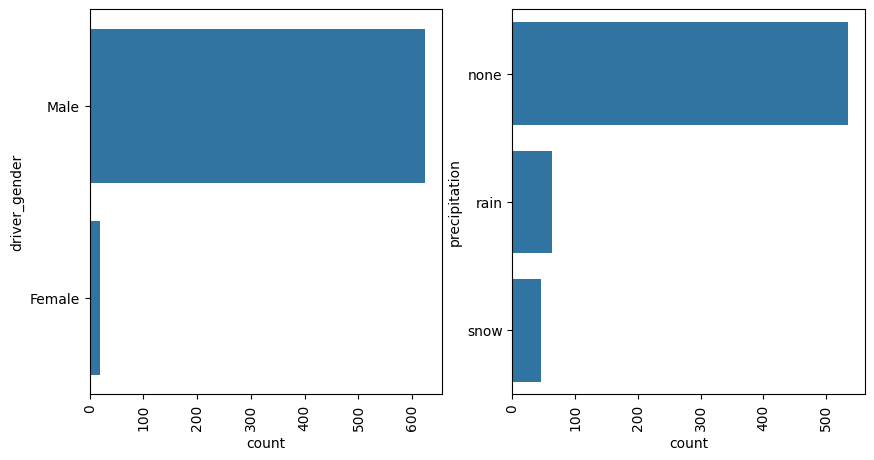

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['driver_gender'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['precipitation'])
plt.xticks(rotation=90)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

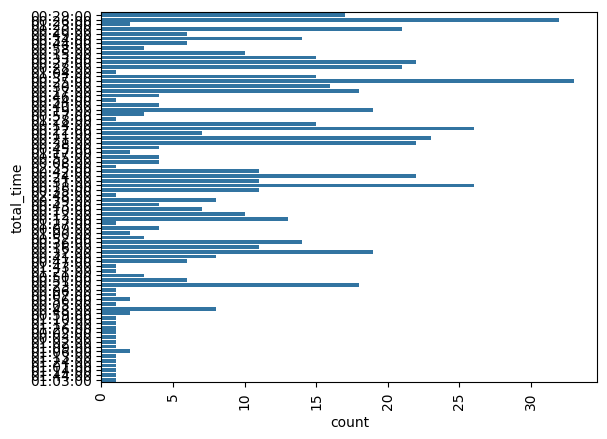

In [ ]:
sns.countplot(dataset['total_time'])
plt.xticks(rotation=90)

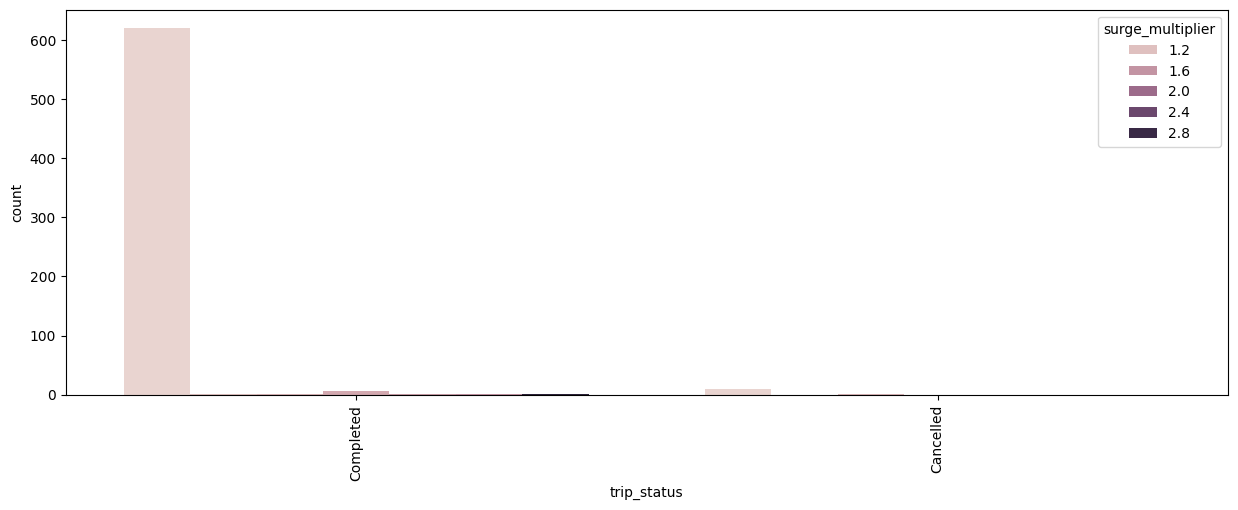

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='trip_status', hue='surge_multiplier')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset['DAY'] = dataset.trip_start_time.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

AttributeError: 'DataFrame' object has no attribute 'DAY'

<Axes: xlabel='distance_kms', ylabel='Density'>

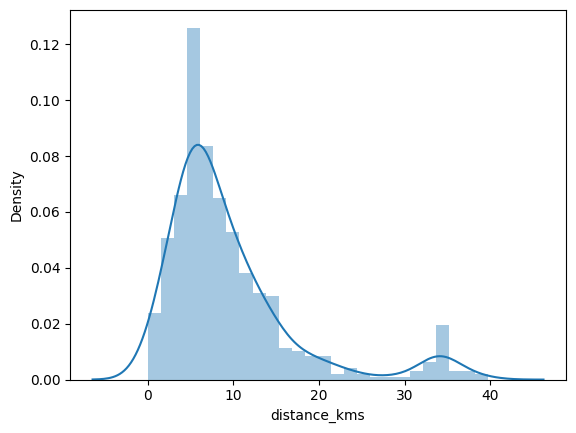

In [ ]:
sns.distplot(dataset[dataset['distance_kms']<40]['distance_kms'])

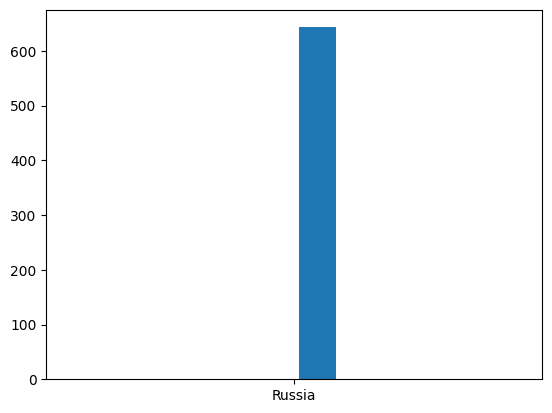

In [ ]:
plt.hist(dataset["country"], bins=10, rwidth=0.8)
plt.show()

In [ ]:
dataset['price_usd'].value_counts()

3.41    5
2.83    5
2.79    5
2.76    5
3.62    5
       ..
3.44    1
2.37    1
4.91    1
4.68    1
4.55    1
Name: price_usd, Length: 419, dtype: int64

In [ ]:
dataset['distance_kms'].value_counts()

0.01     6
5.89     5
10.04    4
5.66     4
5.65     4
        ..
2.64     1
12.33    1
4.70     1
7.23     1
9.03     1
Name: distance_kms, Length: 467, dtype: int64

In [ ]:
dataset['weather_main'].head()

0      partly-cloudy-day
1      partly-cloudy-day
2      partly-cloudy-day
3    partly-cloudy-night
4    partly-cloudy-night
Name: weather_main, dtype: object

In [ ]:
dataset['weather_desc'].head()

0    Mostly Cloudy
1    Mostly Cloudy
2    Mostly Cloudy
3    Partly Cloudy
4    Partly Cloudy
Name: weather_desc, dtype: object

In [ ]:
data = dataset.select_dtypes(include =['int64','float64'])
data.head()

,surge_multiplier,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
0,1.0,60.031438,30.329826,59.963131,30.307655,51.28,5.17,9.29,12,12,0.69,4.81
1,1.0,59.963014,30.307313,60.031351,30.329495,51.28,4.97,9.93,10,10,0.70,6.53
2,1.0,60.031529,30.329416,59.924281,30.387561,49.50,13.01,18.01,14,14,0.61,5.25
3,2.9,59.959883,30.311159,59.934680,30.308489,49.53,25.99,5.10,3,3,0.84,0.87
4,1.4,59.934813,30.308553,60.031470,30.329402,49.53,13.43,21.92,3,1,0.90,1.61


In [ ]:
categorical_cols =dataset.select_dtypes(include=['object'])
categorical_cols.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,city,country,trip_start_address,trip_end_address,price_rub,temperature_time,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 17:26,11-05-2015 17:55,00:21:33,...,Saint Petersburg,Russia,"ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, R...","Bolshoy prospekt PS, 74, Sankt-Peterburg, Russ...",265,2015-05-11T17:26:00,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 18:46,11-05-2015 19:12,00:19:27,...,Saint Petersburg,Russia,"Podrezova ulitsa, 2, Sankt-Peterburg, Russia, ...","ulitsa Esenina, 1 корпус 1, Sankt-Peterburg, R...",255,2015-05-11T18:46:00,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-05-2015 09:15,13-05-2015 10:38,01:06:53,...,Saint Petersburg,Russia,"ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, R...","ploshchad' Aleksandra Nevskogo, 2, Sankt-Peter...",644,2015-05-13T09:15:00,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 00:24,16-05-2015 00:44,00:13:37,...,Saint Petersburg,Russia,"Pushkarskiy pereulok, Sankt-Peterburg, Russia,...","Voznesenskiy prospekt, 3, Sankt-Peterburg, Rus...",1287,2015-05-16T00:24:00,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 01:29,16-05-2015 02:18,00:38:54,...,Saint Petersburg,Russia,"Voznesenskiy prospekt, 6, Sankt-Peterburg, Rus...","ulitsa Esenina, 3 корпус 1, Sankt-Peterburg, R...",665,2015-05-16T01:29:00,0.31,partly-cloudy-night,Partly Cloudy,none


<Axes: xlabel='price_rub', ylabel='price_usd'>

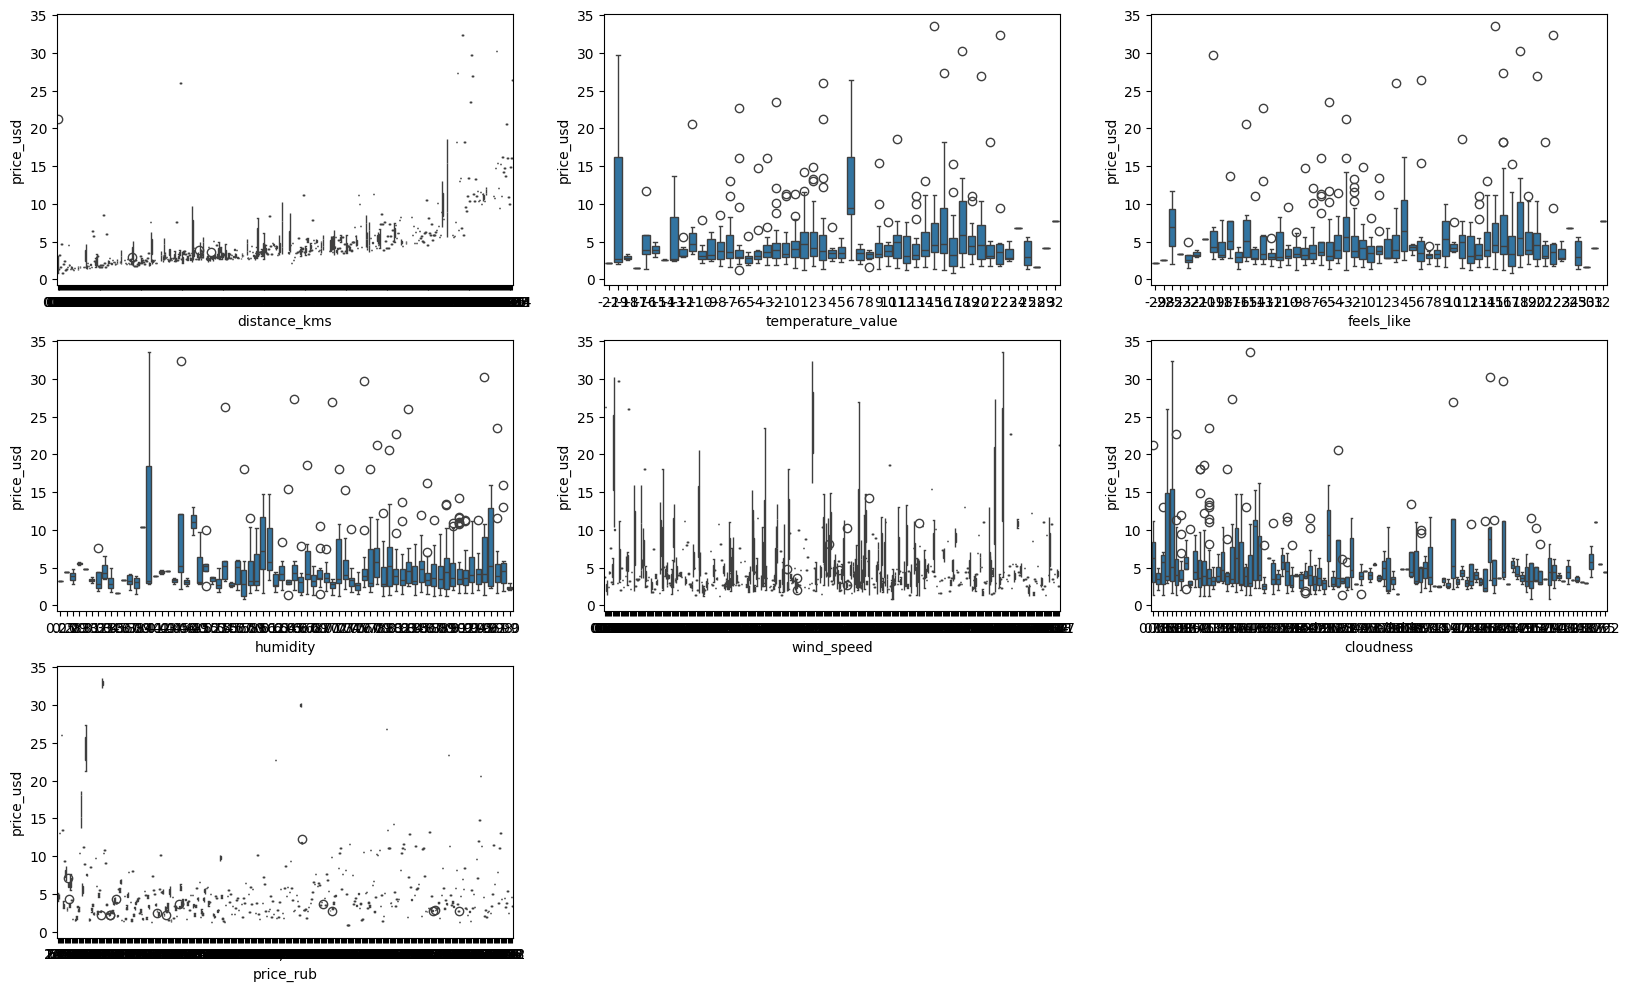

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='distance_kms', y='price_usd', data=dataset)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='temperature_value', y='price_usd', data=dataset)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='feels_like', y='price_usd', data=dataset)

plt.subplot(3, 3, 4)
sns.boxplot(x='humidity', y='price_usd', data=dataset)

plt.subplot(3, 3, 5)
sns.boxplot(x='wind_speed', y='price_usd', data=dataset)

plt.subplot(3, 3, 6)
sns.boxplot(x='cloudness', y='price_usd', data=dataset)

plt.subplot(3, 3, 7)
sns.boxplot(x='price_rub', y='price_usd', data=dataset)

<Axes: xlabel='rub_usd_exchange_rate', ylabel='price_usd'>

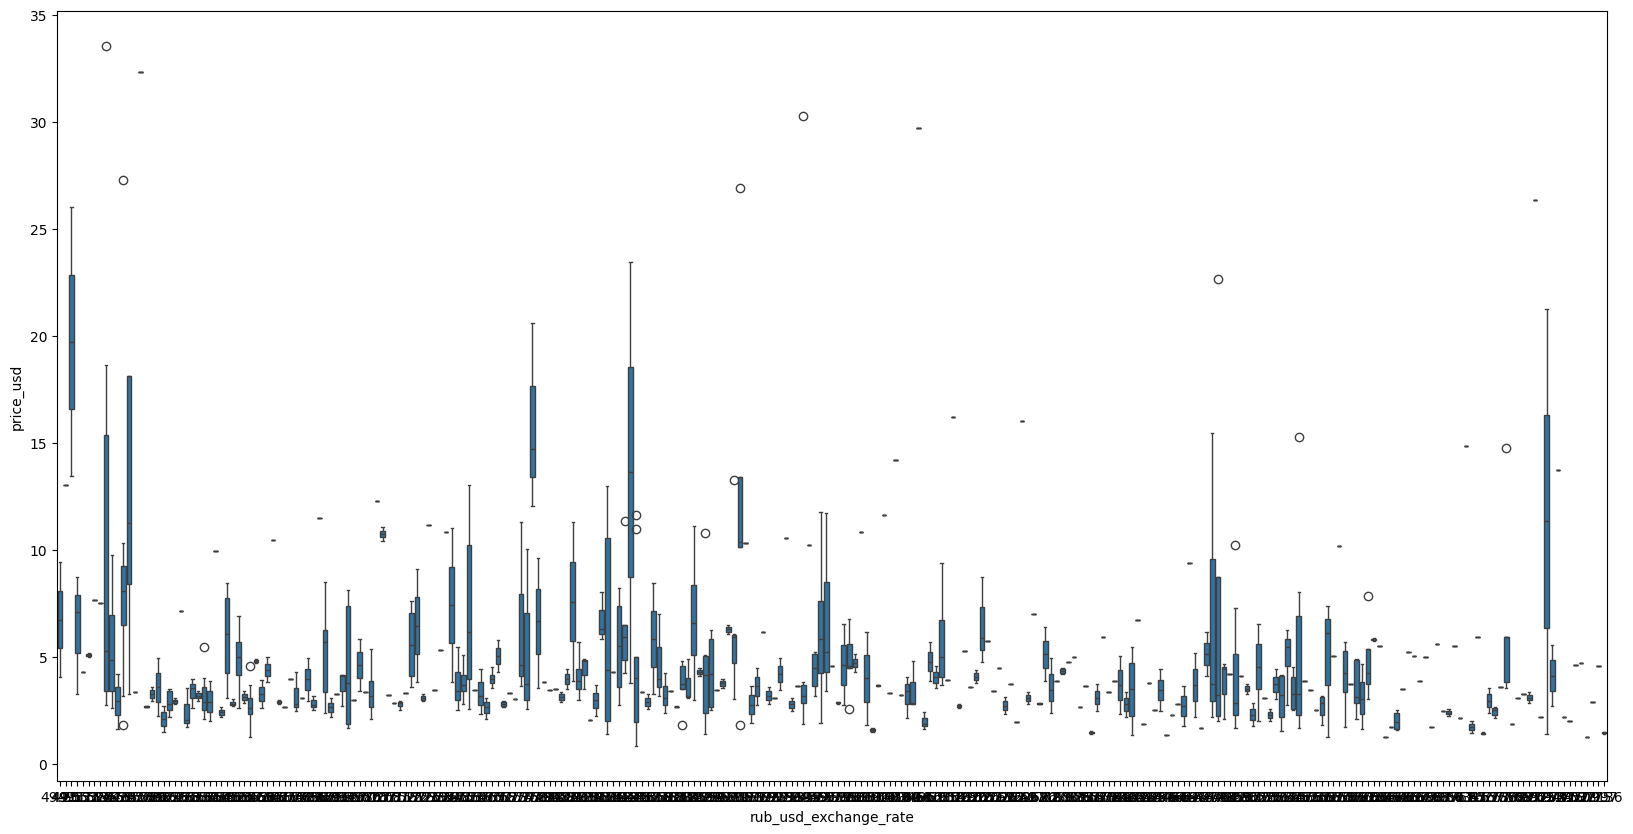

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rub_usd_exchange_rate', y='price_usd', data=dataset)

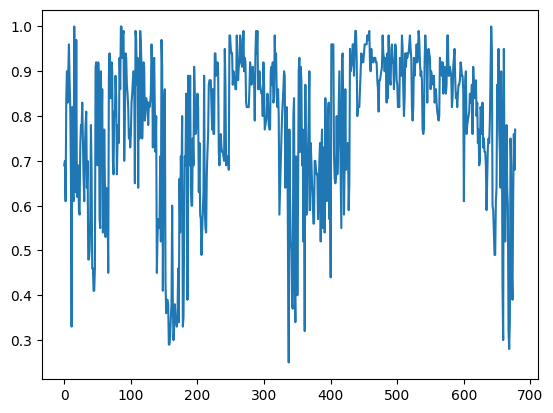

       surge_multiplier  pickup_lat  pickup_long  dropoff_lat  dropoff_long  \
count        643.000000  678.000000   678.000000   678.000000    678.000000   
mean           1.011353   59.756784    31.740062    59.758561     31.739366   
std            0.096085    0.800432     6.063872     0.799396      6.062101   
min            1.000000   55.605800    30.168447    55.599648     29.947507   
25%            1.000000   59.932134    30.364931    59.933576     30.366456   
50%            1.000000   59.941415    30.366456    59.941415     30.368724   
75%            1.000000   59.960492    30.420179    59.961987     30.417860   
max            2.900000   60.126500    60.809913    60.126957     60.809916   

       rub_usd_exchange_rate   price_usd  distance_kms  temperature_value  \
count             678.000000  678.000000    678.000000         678.000000   
mean               60.517463    5.061593     10.057788           5.327434   
std                 4.526606    4.251843      8.735132   

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 17:26,11-05-2015 17:55,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11-05-2015 18:46,11-05-2015 19:12,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,13-05-2015 09:15,13-05-2015 10:38,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 00:24,16-05-2015 00:44,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,16-05-2015 01:29,16-05-2015 02:18,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("uber_dataset.csv")
plt.plot(data['humidity'])
plt.show()
print(data.describe())

a=data.shape
print(a)
##The Name of the driver and the the total number of trips done by that driver
n=pd.DataFrame(data['driver_name_en'].value_counts())
print(n)

##The Name of the city and the number of times the cities were visited in trips
c=pd.DataFrame([data['city'].value_counts()],index=[1])
print(c)

data.head()

In [ ]:
df_hour_grouped = dataset.groupby(['total_time']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'trip_status':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index)

df_hour.head()

,trip_status
total_time,
00:02:00,1
00:03:00,1
00:05:00,1
00:06:00,1
00:07:00,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('total_time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_time'}, axis=1)
              .sort_values('total_time', ascending=True))
  xs = counted['total_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('total_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('total_time')):
  _plot_series(series, series_name, i)
  fig.legend(title='total_time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_status']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_status'}, axis=1)
              .sort_values('trip_status', ascending=True))
  xs = counted['trip_status']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('trip_status', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('total_time')):
  _plot_series(series, series_name, i)
  fig.legend(title='total_time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_status')
_ = plt.ylabel('count()')

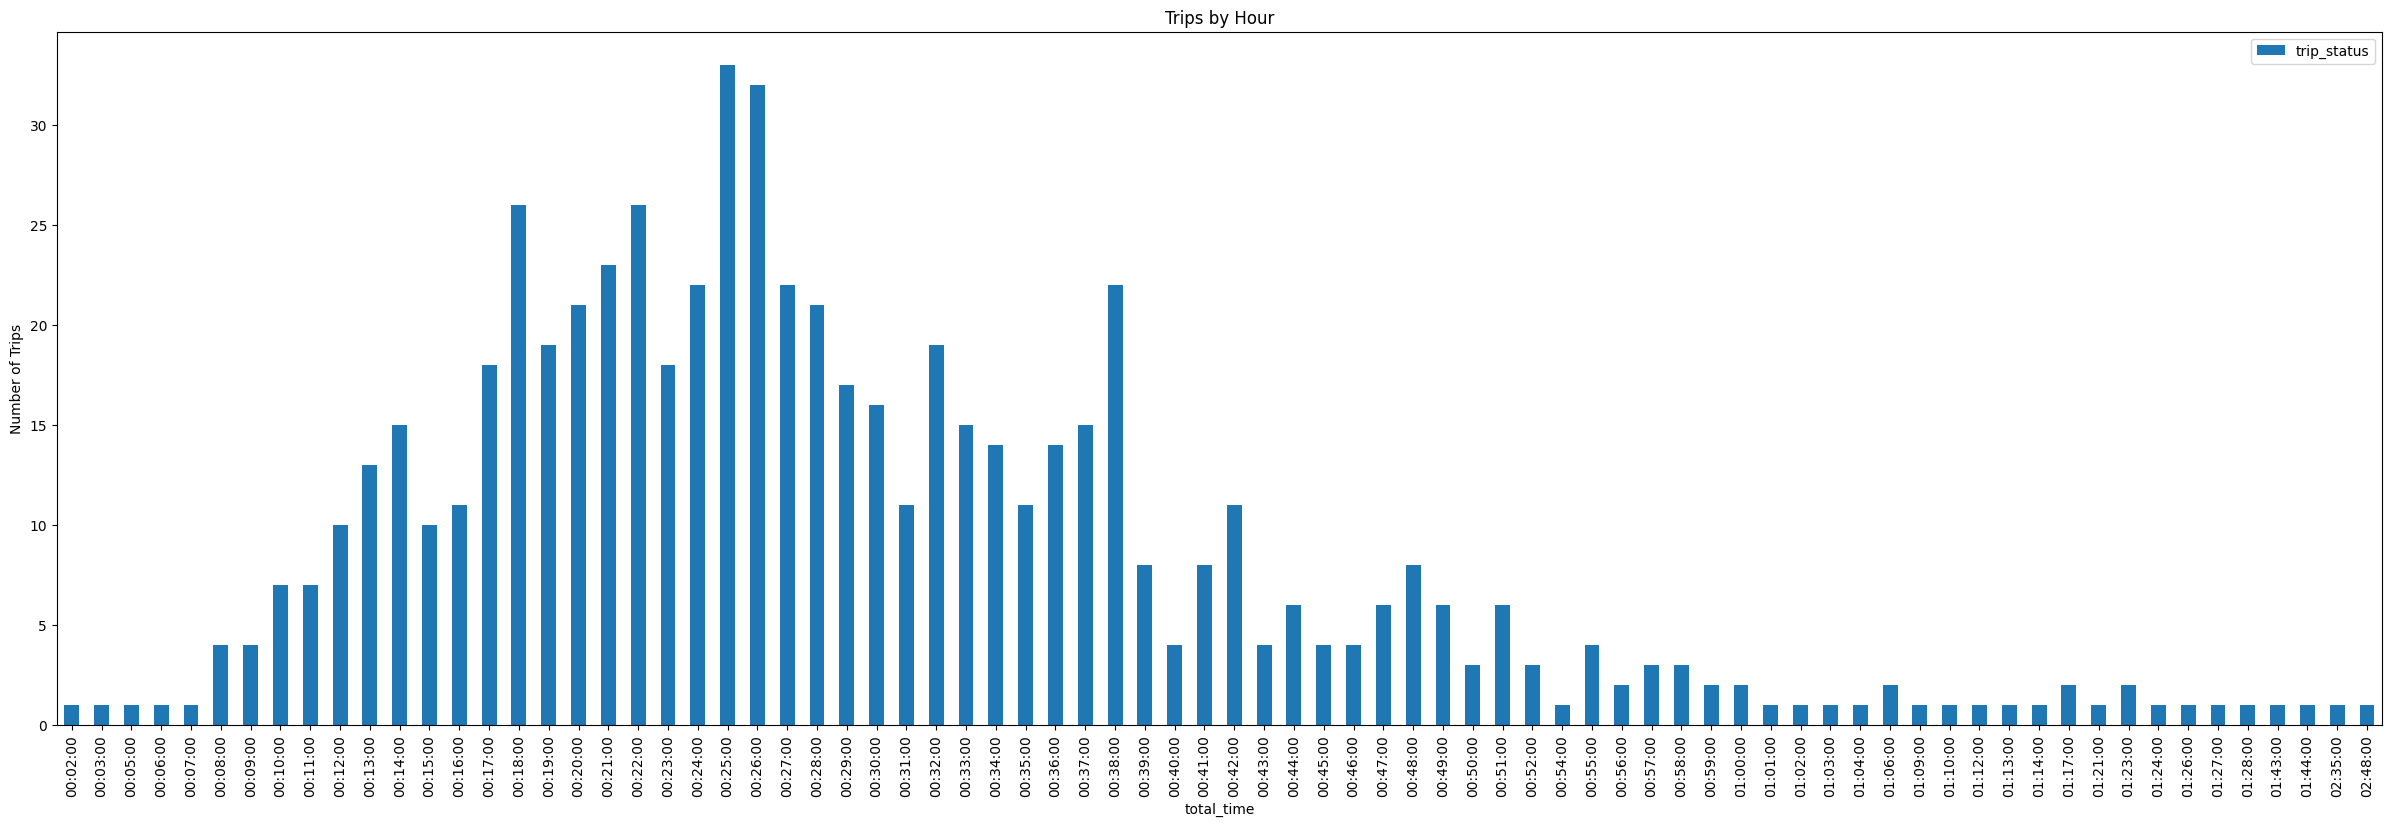

In [ ]:
df_hour.plot(kind='bar', figsize=(30,9))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

In [ ]:
df_month_grouped = dataset.groupby(['trip_completed_at'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'trip_status':df_month_grouped.values[:,0]}, index = df_month_grouped.index)

df_month

,trip_status
trip_completed_at,
"May 11, 2015 at 6:55PM",1
"May 11, 2015 at 8:12PM",1
"May 13, 2015 at 11:38AM",1
"May 16, 2015 at 1:44AM",1
"May 16, 2015 at 3:18AM",1
...,...
"April 23, 2018 at 12:11PM",1
"April 24, 2018 at 02:58PM",1
"April 26, 2018 at 03:57PM",1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_status']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_status'}, axis=1)
              .sort_values('trip_status', ascending=True))
  xs = counted['trip_status']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('trip_status', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_status')
_ = plt.ylabel('count()')

In [ ]:
dataset['trip_start_time'] = pd.to_datetime(dataset['trip_start_time'],
									errors='coerce')
dataset['trip_end_time'] = pd.to_datetime(dataset['trip_end_time'],
									errors='coerce')


In [ ]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['trip_start_time']).date
dataset['time'] = pd.DatetimeIndex(dataset['trip_start_time']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

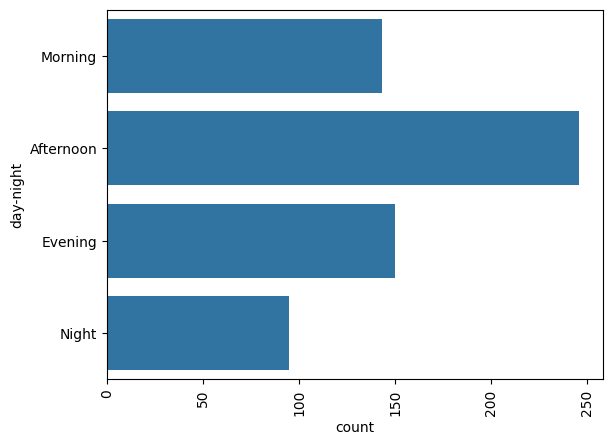

In [ ]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

In [ ]:
dataset['DAY'] = dataset.trip_start_time.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

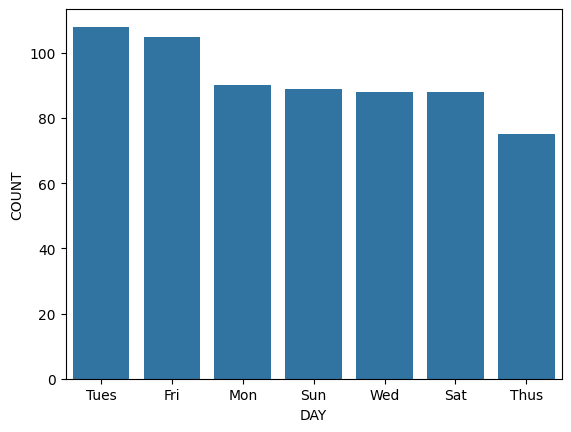

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

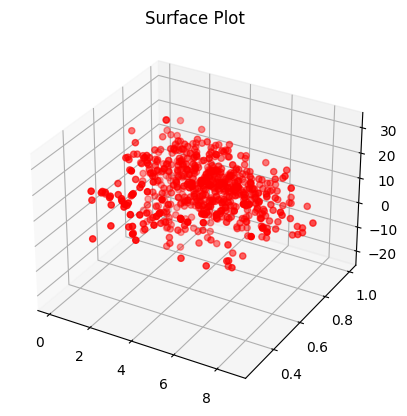

None


In [ ]:
fig=plt.figure()
d=fig.add_subplot(111,projection='3d')
x=dataset['wind_speed'].values
y=dataset['humidity'].values
z=dataset['temperature_value'].values
d.scatter(x,y,z,c='r')
d.set_title('Surface Plot')
f=plt.show()
print(f)

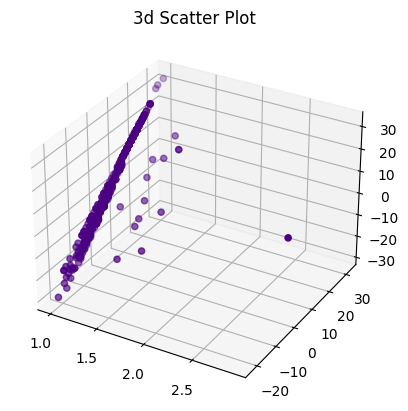

None


In [ ]:
fig=plt.figure()
k=plt.axes(projection='3d')
x1=dataset['surge_multiplier'].values
y1=dataset['temperature_value'].values
z1=dataset['feels_like'].values
k.scatter(x1,y1,z1,c='Indigo')
k.set_title('3d Scatter Plot')
g=plt.show()
print(g)

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('uber_dataset.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Entire Uber Dataset', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('uber_dataset.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.update_layout(title='Uber Data Analysis', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()